# Timber bucking demo

This notebook demonstrates timber objects, tapers, pricelists, the Nasberg bucking algorithm and how solution cubes store many results in `xarray`.

In [1]:
from pyforestry.base.pricelist import create_pricelist_from_data
from pyforestry.sweden.pricelist.data.mellanskog_2013 import Mellanskog_2013_price_data
from pyforestry.base.pricelist.solutioncube import SolutionCube
from pyforestry.base.timber_bucking.nasberg_1985 import BuckingConfig, Nasberg_1985_BranchBound
from pyforestry.sweden.taper import EdgrenNylinder1949
from pyforestry.sweden.timber.swe_timber import SweTimber

## Create timber object

In [2]:
timber = SweTimber(species="pinus sylvestris", diameter_cm=18, height_m=25)
timber

## Load pricelist

In [3]:
pricelist = create_pricelist_from_data(
    Mellanskog_2013_price_data, species_to_load="pinus sylvestris"
)
pricelist.Timber.keys()

dict_keys(['pinus sylvestris'])

## Run bucking optimizer

In [4]:
optimizer = Nasberg_1985_BranchBound(timber, pricelist, EdgrenNylinder1949)
result = optimizer.calculate_tree_value(
    min_diam_dead_wood=99, config=BuckingConfig(save_sections=True)
)
result

BuckingResult(species_group='pinus sylvestris', total_value=np.float32(116.55982), top_proportion=0.0, dead_wood_proportion=0.0, high_stump_volume_proportion=0.0, high_stump_value_proportion=0.0, last_cut_relative_height=np.float64(1.106), volume_per_quality=[0.0, 0.1061747827409899, 0.10089169267225448, 0.0931144950816689, 0.0, 0.03325533384575725, 0.0], timber_price_by_quality=[0.0, np.float32(374.95026), np.float32(395.25204), np.float32(175.33333), 0.0, 0.0, 0.0], vol_fub_5cm=0.3315022903380483, vol_sk_ub=0.33342746304095644, DBH_cm=np.float64(18.000000000000004), height_m=25, stump_height_m=0.25, diameter_stump_cm=np.float64(20.503363467016907), taperDiams_cm=[20.50336265563965, 19.994277954101562, 19.61321449279785, 19.30855369567871, 19.054716110229492, 18.83714485168457, 18.646760940551758, 18.47751808166504, 18.325185775756836, 18.186691284179688, 18.059728622436523, 17.942522048950195, 17.833681106567383, 17.732088088989258, 17.6368408203125, 17.547189712524414, 17.4625167846

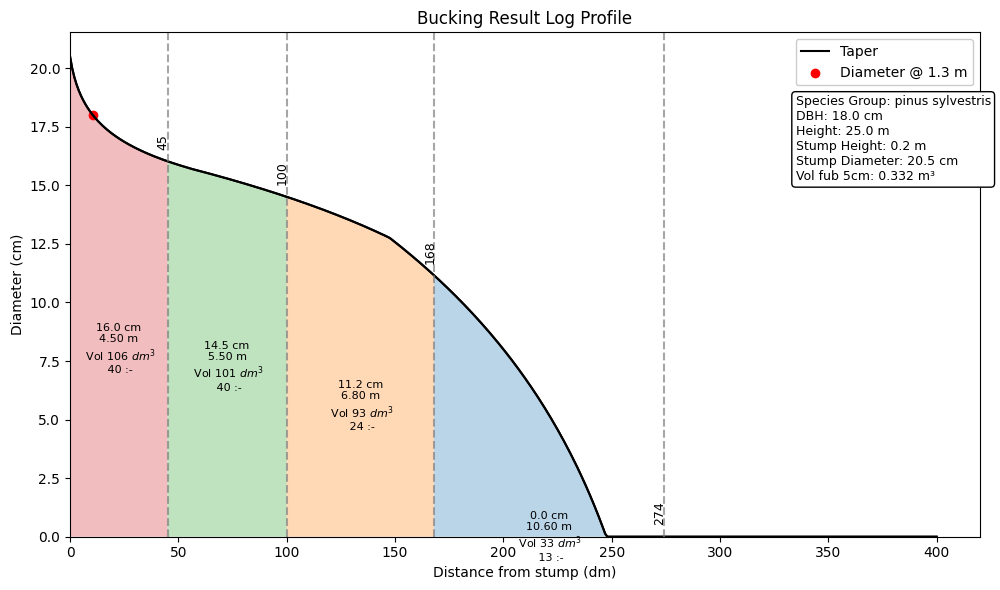

In [5]:
result.plot()

## Generate a small solution cube

In [6]:
cube = SolutionCube.generate(
    pricelist_data=Mellanskog_2013_price_data,
    taper_model=EdgrenNylinder1949,
    species_list=["picea abies"],
    dbh_range=(20, 22),
    height_range=(15, 15.2),
    dbh_step=2,
    height_step=0.2,
    workers=1,
)
cube.dataset

Generating Solution Cube using 1 parallel processes...
Pricelist hash: 4058af6a860784c4a6ce94f561a4f484a0401624c2f3cc8405c3074570164174
Total trees to process: 4


Generating Solution Cube:   0%|          | 0/4 [00:00<?, ?it/s]

Generating Solution Cube: 100%|██████████| 4/4 [00:00<00:00, 564.40it/s]


Finished parallel computation in 2.21 seconds.
Successfully created xarray Dataset.


<xarray.Dataset> Size: 88B
Dimensions:            (species: 1, height: 2, dbh: 2)
Coordinates:
  * species            (species) object 8B 'picea abies'
  * height             (height) float64 16B 15.0 15.2
  * dbh                (dbh) int64 16B 20 22
Data variables:
    total_value        (species, height, dbh) float32 16B 58.26 74.62 ... 75.07
    solution_sections  (species, height, dbh) object 32B '[{"start_point": 65...
Attributes:
    pricelist_hash:     4058af6a860784c4a6ce94f561a4f484a0401624c2f3cc8405c30...
    taper_model:        EdgrenNylinder1949
    creation_date_utc:  2025-10-10T14:27:45.118152+00:00
    dbh_range:          20-22 cm
    height_range:       15-15.2 m

In [7]:
cube.lookup(species="picea abies", dbh=20.0, height=15.0)

(58.26210403442383,
 [{'start_point': 65,
   'end_point': 167,
   'volume': 0.03310527347739895,
   'top_diameter': 0.0,
   'value': 12.579999923706055,
   'species_group': 'picea abies',
   'timber_proportion': 0.0,
   'pulp_proportion': 0.0,
   'cull_proportion': 0.0,
   'fuelwood_proportion': 0.0,
   'quality': 5},
  {'start_point': 38,
   'end_point': 65,
   'volume': 0.042643452194317866,
   'top_diameter': 12.15531063079834,
   'value': 11.300515174865723,
   'species_group': 'picea abies',
   'timber_proportion': 1.0,
   'pulp_proportion': 0.0,
   'cull_proportion': 0.0,
   'fuelwood_proportion': 0.0,
   'quality': 2},
  {'start_point': 0,
   'end_point': 38,
   'volume': 0.11114989343153897,
   'top_diameter': 16.11395835876465,
   'value': 34.381587982177734,
   'species_group': 'picea abies',
   'timber_proportion': 1.0,
   'pulp_proportion': 0.0,
   'cull_proportion': 0.0,
   'fuelwood_proportion': 0.0,
   'quality': 1}])